# EDGE DETECTION: CANNY EDGE DETECTION #

[OPEN-CV-SHORT-DOCUMENT](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

[Wikipedia-Document on Canny Edge Detection](https://en.wikipedia.org/wiki/Canny_edge_detector)

- Canny Edge detection is the most popular algorithm, the maths itself is pretty high-level but for the sake of practicallity we're going to skip that bc the code itself is just a couple of lines anyway.

## Canny Edge detection process ##

1. Apply smoothing first or else it'll be full of noise and hence, full of edges when detecting

--> u can apply Gaussian filter

2. Find the intensity gradients of img
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges 
5. Suppress (get rid of) all the edges that are _weak_ and _unconnected_ and just find really strong ones

- Requires users to decide low/high threshold values (manual adjust)

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('DATA/sammy_face.jpg')

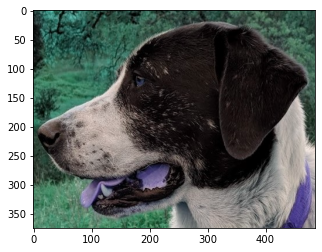

In [3]:
plt.imshow(img) #### U DON'T HAVE TO CARE ABOUT THE COLOR CHANNELS

In [4]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

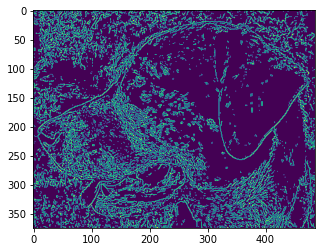

In [5]:
plt.imshow(edges)

In [6]:
####### FORMULA TO better Find the values for the thresholds #########

In [10]:
medVal = np.median(img)   #median pixel value

In [11]:
medVal

64.0

![](https://docs.opencv.org/3.4/hysteresis.jpg)

In [15]:
# set the lower and upper bound of the threshold 

In [16]:
#  SET LOWEST POSSIBLE THRESHOLD to either 0 or 70% of MEDIAN VALUE WHICHEVER IS GREATER (bc 70% medVal may or may not be greater than floor 0)
lower = int(max(0, 0.7*medVal))
            
# SET UPPER THRESHOLD TO EITHER 130% (30% above medVal) OR THE MAX 255, WHICHEVER IS SMALLER 
upper = int(min(255, 1.3*medVal))

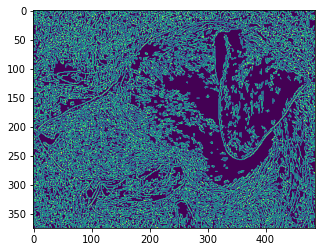

In [17]:
edges = cv2.Canny(image=img, threshold1=lower, threshold2=upper)
plt.imshow(edges)

In [18]:
upper

83

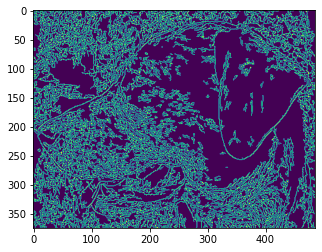

In [19]:
edges = cv2.Canny(image=img, threshold1=lower, threshold2=upper+100)
plt.imshow(edges)

In [23]:
# TRY BLURRING IT TO SEE IF IT IMPROVES

In [24]:
blurred_img = cv2.blur(img, ksize = (5,5))

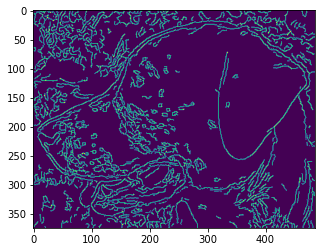

In [26]:
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper)
plt.imshow(edges)

In [27]:
## best one so far ! After we blurred it !

# Takeaways

1. Try experimenting with the kernel size to see if it's better
2. Expand the upper limit (eg. +50)
3. Always blur the image to remove noise and get better results !